## H1N1 Vaccine Usage Prediction

This model focuses on understanding the subset of population who got themselves vaccinated against the seasonal flu(H1N1 flu) and also aims to understand the factors which influences the chances of people getting themselves vaccinated.



In [78]:
#Importing the required packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [79]:
#Checking the current working directory

os.getcwd()

'D:\\Hariharan\\Desktop\\imarticus'

In [80]:
os.chdir(r"D:\Hariharan\Desktop\imarticus")

In [81]:
#Importing the dataset

vaccine=pd.read_csv("h1n1_vaccine_prediction.csv")

In [82]:
vaccine

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [83]:
vaccine["h1n1_vaccine"].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [84]:
#head() shows the top 5 columns i.e. in this case it shows the top 5 people's data
vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [85]:
#shows the datatypes of each variable in the dataset
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [86]:
#Checking the missing values
vaccine.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [87]:
#shape() tells us the rows and columns present in the dataset
vaccine.shape

(26707, 34)

In [88]:
vaccine["income_level"].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

### 1.h1n1_worry

In [89]:
vaccine["h1n1_worry"].value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

Filling the missing values in h1n1_worry variable with mode

In [90]:
vaccine['h1n1_worry'] = vaccine['h1n1_worry'].fillna(vaccine['h1n1_worry'].mode()[0])

In [91]:
vaccine["h1n1_worry"].value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

### 2.has_health_insur

In [92]:
vaccine["has_health_insur"].value_counts()

1.0    12697
0.0     1736
Name: has_health_insur, dtype: int64

We filled has_health_insur variable with an arbitary value which we took as 9

In [93]:
vaccine["has_health_insur"].fillna((9), inplace=True)

In [94]:
vaccine["has_health_insur"].value_counts()

1.0    12697
9.0    12274
0.0     1736
Name: has_health_insur, dtype: int64

### Feature Engineering

We created a new variable insurance_status from the column has_health_insur. Since we had created a new category of missing values by putting the arbitary value of 9, so we decided to create a new variable which rather than dealing with 0s and 1s binary value talks about all the 3 categories formed by demarcating them on the basis of insurance status.

In [95]:
vaccine["insurance_status"]=np.where(vaccine["has_health_insur"]==9,0,1)

We checked out a few variables and their categories

In [96]:
vaccine["h1n1_awareness"].value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

In [97]:
vaccine["antiviral_medication"].value_counts()

0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64

In [98]:
vaccine["contact_avoidance"].value_counts()

1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64

In [99]:
vaccine["bought_face_mask"].value_counts()

0.0    24847
1.0     1841
Name: bought_face_mask, dtype: int64

In [100]:
vaccine["wash_hands_frequently"].value_counts()

1.0    22015
0.0     4650
Name: wash_hands_frequently, dtype: int64

In [101]:
vaccine["avoid_large_gatherings"].value_counts()

0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64

In [102]:
vaccine["reduced_outside_home_cont"].value_counts()

0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

In [103]:
vaccine["avoid_touch_face"].value_counts()

1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64

In [104]:
vaccine.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine', 'insurance_status'],
      dtype='object')

Filling all the missing variables with the mode

In [105]:
cols = ["antiviral_medication","contact_avoidance","bought_face_mask","wash_hands_frequently","h1n1_awareness"]
vaccine[cols]=vaccine[cols].fillna(vaccine.mode().iloc[0])

In [106]:
cols = ["avoid_large_gatherings","reduced_outside_home_cont","avoid_touch_face"]
vaccine[cols]=vaccine[cols].fillna(vaccine.mode().iloc[0])

In [107]:
vaccine["chronic_medic_condition"].value_counts()

0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64

In [108]:
vaccine["cont_child_undr_6_mnths"].value_counts()

0.0    23749
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

In [109]:
vaccine["is_health_worker"].value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [110]:
vaccine["is_h1n1_vacc_effective"].value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

In [111]:
cols = ["chronic_medic_condition","cont_child_undr_6_mnths","is_health_worker","is_h1n1_vacc_effective","is_h1n1_risky"]
vaccine[cols]=vaccine[cols].fillna(vaccine.mode().iloc[0])

In [112]:
cols = ["sick_from_h1n1_vacc","is_seas_vacc_effective","is_seas_risky","sick_from_seas_vacc"]
vaccine[cols]=vaccine[cols].fillna(vaccine.mode().iloc[0])

In [113]:
vaccine["no_of_children"].value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64

In [114]:
vaccine["no_of_adults"].value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64

Filling missing values in  no_of_adults and no_of_children variables with the median

In [115]:
cols = ["no_of_adults","no_of_children"]
vaccine[cols]=vaccine[cols].fillna(vaccine.median().iloc[0])

Checking out the object variables only from the entire dataset

In [116]:
vaccine.select_dtypes(include=['object'])

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [117]:
vaccine["age_bracket"].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

## Grouping of age bracket variable

#age bracket groups formed
1.above 18
2.above 40
3.above 65

In [118]:
vaccine["age_bracket"]=vaccine["age_bracket"].replace(["65+ Years"], "65_and_above")
vaccine["age_bracket"]=vaccine["age_bracket"].replace(["45 - 54 Years","55 - 64 Years"], "45_and_above")
vaccine["age_bracket"]=vaccine["age_bracket"].replace(["18 - 34 Years","35 - 44 Years"], "18_and_above")

In [119]:
vaccine["age_bracket"].value_counts()

45_and_above    10801
18_and_above     9063
65_and_above     6843
Name: age_bracket, dtype: int64

## Grouping of qualification variable

In [120]:
vaccine["qualification"].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [121]:
vaccine["qualification"]=vaccine["qualification"].replace(["< 12 Years"], "middle_scl")
vaccine["qualification"]=vaccine["qualification"].replace(["12 Years"], "high_scl")
vaccine["qualification"]=vaccine["qualification"].replace(["Some College"], "college")
vaccine["qualification"]=vaccine["qualification"].replace(["College Graduate"], "college_grad")

In [122]:
vaccine["qualification"].value_counts()

college_grad    10097
college          7043
high_scl         5797
middle_scl       2363
Name: qualification, dtype: int64

In [123]:
vaccine["qualification"].fillna(("others"), inplace=True)

## Grouping of Race Variable 

We just changed the column Other or multiple to Others

In [124]:
vaccine["race"].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [125]:
vaccine["race"]=vaccine["race"].replace(["Other or Multiple"], "Others")


In [126]:
vaccine["race"].value_counts()

White       21222
Black        2118
Hispanic     1755
Others       1612
Name: race, dtype: int64

### We changed the sex variable to integer datatype by assigning values(1,0)

Male=1
Female=0

In [127]:
vaccine["sex"]=np.where(vaccine["sex"]=="Male",1,0)

In [128]:
vaccine["sex"].value_counts()

0    15858
1    10849
Name: sex, dtype: int64

## Grouping of Income variable

We grouped the income variable as follows:-

1.<= $75,000, Above Poverty- Middle Class
2.> $75,000-Upper Class
3.Below Poverty-Lower Class

In [129]:
vaccine["income_level"].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

In [130]:
vaccine["income_level"]=vaccine["income_level"].replace(["<= $75,000, Above Poverty"], "Middle_Class")
vaccine["income_level"]=vaccine["income_level"].replace(["> $75,000"], "Upper_Class")
vaccine["income_level"]=vaccine["income_level"].replace(["Below Poverty"], "Lower_Class")

In [131]:
vaccine["income_level"].value_counts()

Middle_Class    12777
Upper_Class      6810
Lower_Class      2697
Name: income_level, dtype: int64

We formed another separate category for the missing values and named it others 

In [132]:
vaccine["income_level"].fillna(("others"), inplace=True)

In [133]:
vaccine["income_level"].value_counts()

Middle_Class    12777
Upper_Class      6810
others           4423
Lower_Class      2697
Name: income_level, dtype: int64

## Filling the other missing values 

In [134]:
vaccine["marital_status"].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In marital_status,housing_status,employment columns we treated the missing values by forming a separate category named others for them.

In [135]:
vaccine["marital_status"].fillna(("others"), inplace=True)

In [136]:
vaccine["housing_status"].fillna(("others"), inplace=True)

In [137]:
vaccine["employment"].fillna(("others"), inplace=True)

In [138]:
vaccine["employment"].value_counts()

Employed              13560
Not in Labor Force    10231
others                 1463
Unemployed             1453
Name: employment, dtype: int64

In [139]:
vaccine["census_msa"].value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

We filled the missing values in columns named dr_recc_h1n1_vacc and dr_recc_seasonal_vacc by the median

In [140]:
cols = ['dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc']
vaccine[cols]=vaccine[cols].fillna(vaccine.median().iloc[0])

## Bivariate Plots

In [141]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

### qualification and h1n1 vaccine 

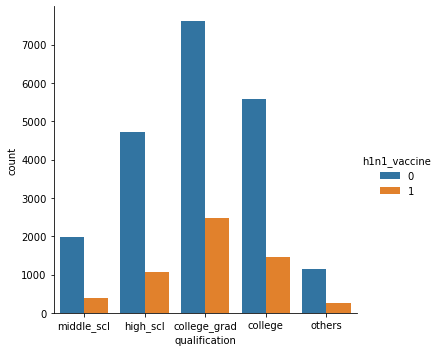

In [142]:
sns.catplot(x='qualification',hue='h1n1_vaccine',data=vaccine,kind="count")

We can observe from this graph that mostly people being college grads came forward in the largest number to get themselved vaccinated while people having completed their qualification only upto middle school didnt come in great numbers for the same.

Others category too has less number of vaccinated individuals.They may be people having lesser qualification below middle scl etc. and thus may not really understand the benefits of getting vaccinated.They maybe having a kind of fear or stigma instilled in their minds regarding the same which need to be removed.

University level qualification people(be it college going students or people who have completed their graduation) are keen to come forward for vaccination , as they are usually considered educated, broad-minded, and also have an  understanding of the threat posed to humans by infectious diseases.


### Sex and h1n1 vaccine

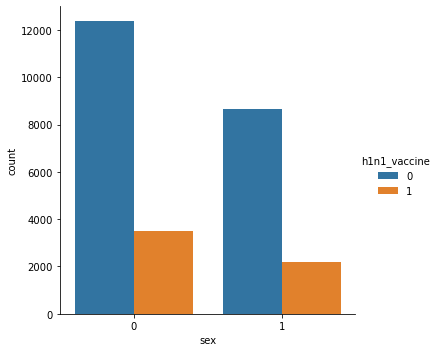

In [143]:
sns.catplot(x='sex',hue='h1n1_vaccine',data=vaccine,kind="count")

Male=1
Female=0

More females are getting vaccinated as compared to males.For this gap, one reason might be due to the fact that men are considered to be more masculine and tough.Thus, this reason is enough for them to avoid taking preventive health care.

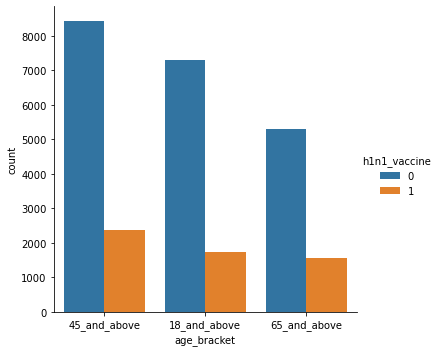

In [144]:
sns.catplot(x='age_bracket',hue='h1n1_vaccine',data=vaccine,kind="count")

45 and above are getting vaccinated more as compared to 65 above and 18 above age bracket.This might be because,the 65 and above age group are frail and thus may not be fit to go to the hospital for their vaccination. Thus they would want the medical employees to come to their homes for the same. For that , requirement of more medical staff is needed since some have to inoculate other age groups coming to the hospital as well and thus this age group shows less number of vaccinated individuals.
House to house vaccination is required.

18 above show less vaccination as it might be that the vaccination net may have been widened to this age group more recently as compared to the 45 above group because of which less number of people may have gone for vaccination since it may be the initial phase. Thus, data would have been less for this age group.



### is_health_worker and h1n1_vaccine

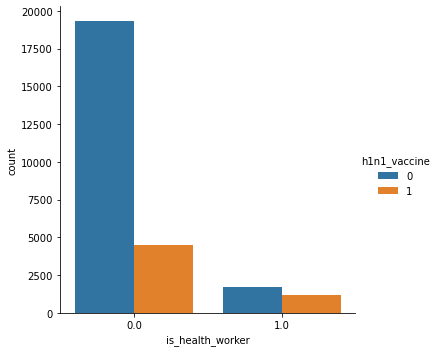

In [145]:
sns.catplot(x='is_health_worker',hue='h1n1_vaccine',data=vaccine,kind="count")

General public is getting vaccinated more as compared to health workers which is in itself an alarming sign.Health workers are responsible for treating the people and if they are not well protected to deal with the disease, it will be very difficult for the entire population in the long run.

### h1n1_awareness and h1n1_vaccine

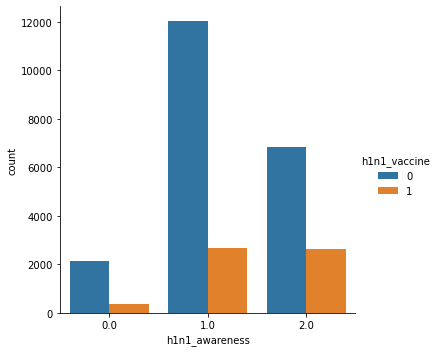

In [146]:
sns.catplot(x='h1n1_awareness',hue='h1n1_vaccine',data=vaccine,kind="count")

More the awareness more the chances of this vaccination drive to be successful.

### income_level and h1n1_vaccine

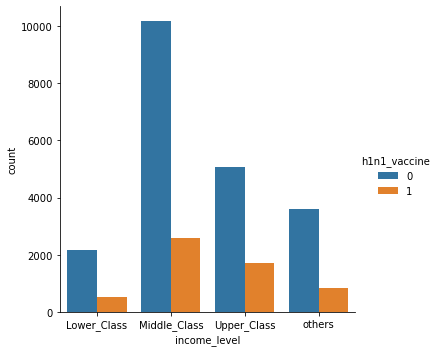

In [147]:
sns.catplot(x='income_level',hue='h1n1_vaccine',data=vaccine,kind="count")

Lower class individuals are less likely to get themselves vaccinated.

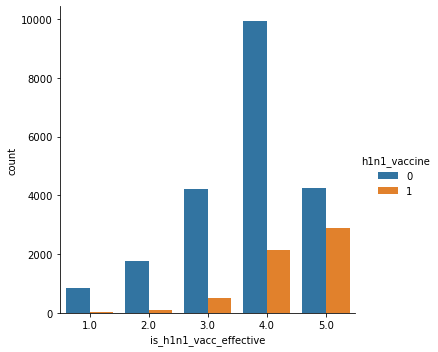

In [148]:
sns.catplot(x='is_h1n1_vacc_effective',hue='h1n1_vaccine',data=vaccine,kind="count")

People who rated 5 in the effectiveness of h1n1 vaccine are more likely to recommend it to others(family,friends, colleagues etc.) and only then will the vaccination count increase. 

More evidence needs to be provided by the government regarding the vaccine efficacy in order to increase awareness and remove hesitation among people regarding vaccinations.

## Outlier Check

In [149]:
vaccine.describe(percentiles=[.01,.02,.03,.04,.05,.1,.15,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
unique_id,26707.0,13353.000000,7709.791156,0.0,267.06,534.12,801.18,1068.24,1335.3,2670.6,...,6676.5,13353.0,20029.5,24035.4,25370.7,25637.76,25904.82,26171.88,26438.94,26706.0
h1n1_worry,26707.0,1.619800,0.909016,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,1.0,2.0,2.0,3.0,3.0,3.00,3.00,3.00,3.00,3.0
h1n1_awareness,26707.0,1.261392,0.617047,0.0,0.00,0.00,0.00,0.00,0.0,1.0,...,1.0,1.0,2.0,2.0,2.0,2.00,2.00,2.00,2.00,2.0
antiviral_medication,26707.0,0.048714,0.215273,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.00,1.00,1.00,1.00,1.0
contact_avoidance,26707.0,0.727749,0.445127,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0
bought_face_mask,26707.0,0.068933,0.253345,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.00,1.00,1.00,1.00,1.0
wash_hands_frequently,26707.0,0.825888,0.379213,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0
avoid_large_gatherings,26707.0,0.357472,0.479264,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0
reduced_outside_home_cont,26707.0,0.336279,0.472444,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0
avoid_touch_face,26707.0,0.678811,0.466942,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.0


We did not find any outliers 

## Co-Relation Check

In [150]:
corr=vaccine.corr()
corr

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,sex,no_of_adults,no_of_children,h1n1_vaccine,insurance_status
unique_id,1.000000,0.017896,0.003473,-0.008458,0.008912,-0.006654,0.011212,0.004455,0.009181,0.007606,...,0.000830,-0.002379,0.005880,-0.005545,0.008849,0.005169,-0.000972,-0.000975,-0.003280,0.001927
h1n1_worry,0.017896,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,...,0.372716,0.355637,0.231649,0.327986,0.220568,-0.127503,0.000706,0.000751,0.121574,-0.113532
h1n1_awareness,0.003473,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,...,0.074394,-0.017038,0.085281,0.081156,-0.050857,-0.067567,-0.048028,-0.048005,0.117771,-0.030766
antiviral_medication,-0.008458,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,...,0.102553,0.076930,0.014498,0.081503,0.078618,-0.006196,0.017890,0.017924,0.040226,0.018468
contact_avoidance,0.008912,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,...,0.116259,0.129983,0.117356,0.127991,0.084346,-0.112591,-0.012427,-0.012410,0.046837,-0.010061
bought_face_mask,-0.006654,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,...,0.128316,0.104655,0.040889,0.105917,0.084084,-0.049912,0.018210,0.018206,0.070413,-0.005313
wash_hands_frequently,0.011212,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,...,0.167414,0.148739,0.136936,0.170655,0.087218,-0.157033,-0.000658,-0.000630,0.074570,-0.036465
avoid_large_gatherings,0.004455,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,...,0.125076,0.183517,0.078208,0.130800,0.131414,-0.055871,0.004038,0.004050,0.018089,-0.053990
reduced_outside_home_cont,0.009181,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,...,0.123348,0.171669,0.066861,0.117428,0.133080,-0.039100,0.001029,0.001038,0.022080,-0.046837
avoid_touch_face,0.007606,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,...,0.144442,0.130461,0.104530,0.141537,0.089156,-0.162693,-0.012536,-0.012519,0.070855,-0.008251


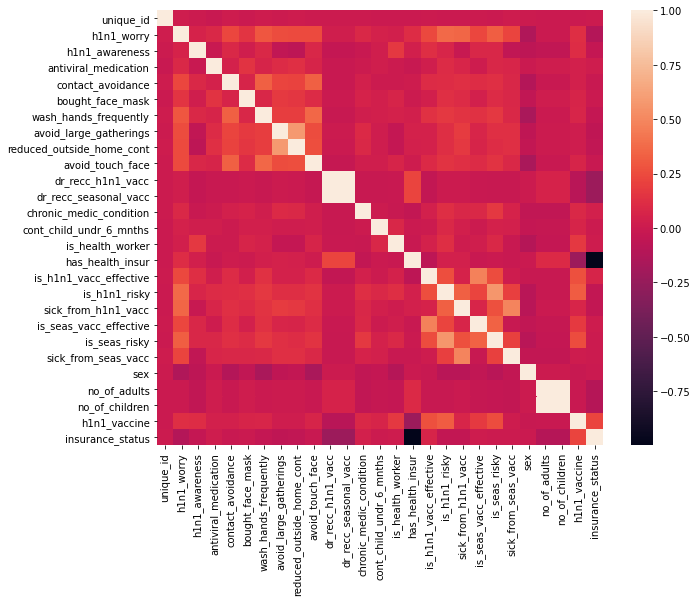

In [151]:
plt.figure(figsize=(10,8))
sns.heatmap(vaccine.corr())
plt.show()

The co-relation was not exceeding the value greater than 0.7 which indicates moderate co-relation between the independent variables.

So no multi-collinearity observed

## Dummy Creation

We converted all the object variable columns to the dummy or indicator variables

In [152]:
vaccine.select_dtypes(include=['object'])

,age_bracket,qualification,race,income_level,marital_status,housing_status,employment,census_msa
0,45_and_above,middle_scl,White,Lower_Class,Not Married,Own,Not in Labor Force,Non-MSA
1,18_and_above,high_scl,White,Lower_Class,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18_and_above,college_grad,White,Middle_Class,Not Married,Own,Employed,"MSA, Not Principle City"
3,65_and_above,high_scl,White,Lower_Class,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45_and_above,college,White,Middle_Class,Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...
26702,65_and_above,college,White,Middle_Class,Not Married,Own,Not in Labor Force,Non-MSA
26703,18_and_above,college_grad,White,Middle_Class,Not Married,Rent,Employed,"MSA, Principle City"
26704,45_and_above,college,White,others,Not Married,Own,others,"MSA, Not Principle City"
26705,18_and_above,college,Hispanic,Middle_Class,Married,Rent,Employed,Non-MSA


In [153]:
vaccine=pd.get_dummies(vaccine, columns=["age_bracket","income_level","marital_status","housing_status","employment","race","qualification","census_msa"], drop_first=True)

## Train Test Split

In [154]:
y=vaccine["h1n1_vaccine"]
X=vaccine.drop(["h1n1_vaccine"],axis=1)

In [155]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2, random_state=88)

In [156]:
scale=MinMaxScaler()
X_train_scaled=scale.fit_transform(X_train)

X_test_scaled=scale.transform(X_test)

#scale=StandardScaler()
#sc_fit=sc.fit(X_train)

In [157]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [158]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [159]:
X_train_scaled

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,employment_others,race_Hispanic,race_Others,race_White,qualification_college_grad,qualification_high_scl,qualification_middle_scl,qualification_others,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0.291096,0.000000,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.801805,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.454505,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.607803,0.666667,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.542987,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21360,0.933798,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
21361,0.092900,1.000000,0.5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21362,0.151539,1.000000,0.5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
21363,0.240845,0.333333,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [160]:
X_test_scaled

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,employment_others,race_Hispanic,race_Others,race_White,qualification_college_grad,qualification_high_scl,qualification_middle_scl,qualification_others,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0.082079,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.554782,1.000000,0.5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.377406,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.432150,1.000000,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.664532,0.000000,0.5,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,0.816184,1.000000,0.5,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
5338,0.835580,0.666667,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5339,0.047892,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5340,0.571445,0.000000,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Logistic Regression

In [161]:
log=LogisticRegression()

In [162]:
model1=log.fit(X_train_scaled,y_train)

C:\Users\hariharan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [163]:
model1

LogisticRegression()

In [164]:
print("accuracy of train",model1.score(X_train_scaled,y_train))
print("accuracy of test",model1.score(X_test_scaled,y_test))

accuracy of train 0.8372571963491692
accuracy of test 0.8307749906402097


In [165]:
pred_train=model1.predict(X_train_scaled)

In [166]:
pred_test=model1.predict(X_test_scaled)

In [167]:
pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [168]:
pred_test

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [169]:
metrics.confusion_matrix(y_train,pred_train)

array([[16064,   782],
       [ 2695,  1824]], dtype=int64)

In [170]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16846
           1       0.70      0.40      0.51      4519

    accuracy                           0.84     21365
   macro avg       0.78      0.68      0.71     21365
weighted avg       0.82      0.84      0.82     21365



In [171]:
metrics.confusion_matrix(y_test, pred_test)
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4187
           1       0.70      0.38      0.49      1155

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.70      5342
weighted avg       0.82      0.83      0.81      5342



In [172]:
#submission = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],
                       #"Survived":test_preds})

### Decision Tree

In [173]:
dt1=DecisionTreeClassifier()
dt1.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [174]:
print("Train score:",dt1.score(X_train_scaled,y_train))

Train score: 1.0


In [175]:
print("Train score:",dt1.score(X_test_scaled,y_test))

Train score: 0.7663796330962186


In [176]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ('gini','entropy'),
              'min_samples_split':[2,3,4,5],
              'max_depth': [2,4,6,8,9,10,11,12],
              'min_samples_leaf':[2,5,10]}

tr = DecisionTreeClassifier()

gsearch = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=2)

gsearch.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=2)]: Done 342 tasks      | elapsed:   27.8s
[Parallel(n_jobs=2)]: Done 842 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 1542 tasks      | elapsed:  2.9min
[Parallel(n_jobs=2)]: Done 1917 out of 1920 | elapsed:  3.9min remaining:    0.3s
[Parallel(n_jobs=2)]: Done 1920 out of 1920 | elapsed:  3.9min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [177]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [178]:
dt2=DecisionTreeClassifier(criterion="entropy",max_depth=6,min_samples_leaf=10,min_samples_split=2)
                          
dt2.fit(X_train_scaled,y_train)
print("Train score:",dt2.score(X_train_scaled,y_train))
print("Test score:",dt2.score(X_test_scaled,y_test))

Train score: 0.8474139948513925
Test score: 0.8375140396855111


In [179]:
pred_train=dt2.predict(X_train_scaled)

In [180]:
pred_test=dt2.predict(X_test_scaled)

In [181]:
metrics.confusion_matrix(y_train,pred_train)

array([[16069,   777],
       [ 2483,  2036]], dtype=int64)

In [182]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     16846
           1       0.72      0.45      0.56      4519

    accuracy                           0.85     21365
   macro avg       0.79      0.70      0.73     21365
weighted avg       0.84      0.85      0.83     21365



In [183]:
metrics.confusion_matrix(y_test,pred_test)

array([[3991,  196],
       [ 672,  483]], dtype=int64)

In [184]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4187
           1       0.71      0.42      0.53      1155

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.71      5342
weighted avg       0.82      0.84      0.82      5342



### Random Forest

In [185]:
rf1=RandomForestClassifier()
rf1.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [186]:
print("Train R2",rf1.score(X_train_scaled,y_train))
print("Test R2",rf1.score(X_test_scaled,y_test))

Train R2 1.0
Test R2 0.8416323474354175


In [187]:
parameters={"n_estimators":[50,100,150,200],
            "criterion":["entropy","gini"],
            "max_depth":[3,5,7,9],
#              "min_samples_split":[2,4,6,10],
#              "min_samples_leaf":[2,4,6,10],
            "bootstrap":[True,False],
            "max_features":["log","sqrt"]
           }

rf=RandomForestClassifier()
rf_gs=GridSearchCV(estimator=rf, param_grid=parameters, scoring="accuracy", verbose=1, n_jobs=2, cv=10)
rf_gs.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  5.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  9.8min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 16.6min
[Parallel(n_jobs=2)]: Done 1280 out of 1280 | elapsed: 18.1min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['log', 'sqrt'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [188]:
rf_gs.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [189]:
rf3=RandomForestClassifier(criterion="gini", max_depth=9, max_features="sqrt", n_estimators=150, bootstrap=True, random_state=88)   
rf3.fit(X_train_scaled, y_train)
print("Train R2 :",rf3.score(X_train_scaled, y_train))
print("Test R2 :",rf3.score(X_test_scaled, y_test))

Train R2 : 0.8688041188860286
Test R2 : 0.8412579558217896


In [190]:
pred_train=rf3.predict(X_train_scaled)
pred_test=rf3.predict(X_test_scaled)

In [191]:
metrics.confusion_matrix(y_train,pred_train)

array([[16494,   352],
       [ 2451,  2068]], dtype=int64)

In [192]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     16846
           1       0.85      0.46      0.60      4519

    accuracy                           0.87     21365
   macro avg       0.86      0.72      0.76     21365
weighted avg       0.87      0.87      0.85     21365



In [193]:
metrics.confusion_matrix(y_test,pred_test)

array([[4062,  125],
       [ 723,  432]], dtype=int64)

In [194]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      4187
           1       0.78      0.37      0.50      1155

    accuracy                           0.84      5342
   macro avg       0.81      0.67      0.71      5342
weighted avg       0.83      0.84      0.82      5342



### ADABOOST

In [195]:
adb=AdaBoostClassifier()

In [196]:
adb.fit(X_train_scaled,y_train)
print("Train score",adb.score(X_train_scaled,y_train))
print("Test score",adb.score(X_test_scaled,y_test))

Train score 0.8519541305874093
Test score 0.8450018719580681


In [197]:
adb1=AdaBoostClassifier(n_estimators=300,learning_rate=.1,random_state=88)

adb1.fit(X_train_scaled,y_train)

print("Train score",adb1.score(X_train_scaled,y_train))
print("Test score",adb1.score(X_test_scaled,y_test))

Train score 0.8507371869880646
Test score 0.8440658929239985


In [198]:
from sklearn.model_selection import GridSearchCV

params={"n_estimators":[50,100,150,200,250,300,350],
            "learning_rate":[1,.1,.01,.001]}

adb2=AdaBoostClassifier()
           
adb_gs=GridSearchCV(adb2,param_grid=params,cv=10,n_jobs=2,verbose=1)
adb_gs.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 15.3min
[Parallel(n_jobs=2)]: Done 280 out of 280 | elapsed: 23.7min finished


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=2,
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350]},
             verbose=1)

In [199]:
adb_gs.best_params_

{'learning_rate': 1, 'n_estimators': 300}

In [200]:
adb3=AdaBoostClassifier(n_estimators=300,learning_rate=1, random_state=88)   
adb3.fit(X_train_scaled, y_train)
print("Train R2 :",adb3.score(X_train_scaled, y_train))
print("Test R2 :",adb3.score(X_test_scaled, y_test))

Train R2 : 0.8539199625555816
Test R2 : 0.8451890677648821


In [201]:
pred_train=adb3.predict(X_train_scaled)
pred_test=adb3.predict(X_test_scaled)

In [202]:
metrics.confusion_matrix(y_train,pred_train)

array([[16026,   820],
       [ 2301,  2218]], dtype=int64)

In [203]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     16846
           1       0.73      0.49      0.59      4519

    accuracy                           0.85     21365
   macro avg       0.80      0.72      0.75     21365
weighted avg       0.84      0.85      0.84     21365



In [204]:
metrics.confusion_matrix(y_test,pred_test)

array([[3987,  200],
       [ 627,  528]], dtype=int64)

In [205]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      4187
           1       0.73      0.46      0.56      1155

    accuracy                           0.85      5342
   macro avg       0.79      0.70      0.73      5342
weighted avg       0.83      0.85      0.83      5342



### XG Boost

In [206]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled,y_train)
print("Train score",xgb.score(X_train_scaled,y_train))
print("Test score",xgb.score(X_test_scaled,y_test))

C:\Users\hariharan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:13:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score 0.9269365785162649
Test score 0.840134780980906


In [207]:
params={"n_estimators":[50,100,150,200,250],
        "max_depth":[5,7,9,11,13,15]}
        #"min_child_weight":[],
        #"subsample":[],
        #"col_sample_bytree":[],
        #"reg_alpha":[],
        #"reg_lambda":[]
        
        


xgb1=XGBClassifier()
           
xgb_gs=GridSearchCV(xgb1,param_grid=params,cv=5,n_jobs=2,verbose=1)
xgb_gs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed: 13.6min finished
C:\Users\hariharan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [208]:
xgb_gs.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [209]:
xgb1=XGBClassifier(n_estimators=50,max_depth=5,random_state=88)

xgb1.fit(X_train_scaled,y_train)

print("Train score",xgb1.score(X_train_scaled,y_train))
print("Test score",xgb1.score(X_test_scaled,y_test))

[21:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score 0.8823777205710274
Test score 0.8438786971171846


In [210]:
pred_train=xgb1.predict(X_train_scaled)
pred_test=xgb1.predict(X_test_scaled)

In [211]:
metrics.confusion_matrix(y_train,pred_train)

array([[16219,   627],
       [ 1886,  2633]], dtype=int64)

In [212]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     16846
           1       0.81      0.58      0.68      4519

    accuracy                           0.88     21365
   macro avg       0.85      0.77      0.80     21365
weighted avg       0.88      0.88      0.87     21365



In [213]:
metrics.confusion_matrix(y_test,pred_test)

array([[3952,  235],
       [ 599,  556]], dtype=int64)

In [214]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4187
           1       0.70      0.48      0.57      1155

    accuracy                           0.84      5342
   macro avg       0.79      0.71      0.74      5342
weighted avg       0.83      0.84      0.83      5342



### KNN

In [215]:
knn1=KNeighborsClassifier()
knn1.fit(X_train_scaled,y_train)
print("Train Score:",knn1.score(X_train_scaled,y_train))
print("Test Score:",knn1.score(X_test_scaled,y_test))


Train Score: 0.8521413526796162
Test Score: 0.8026956196181205


In [216]:
knn2=KNeighborsClassifier(n_neighbors=19)
knn2.fit(X_train_scaled,y_train)
print("Train Score:",knn2.score(X_train_scaled,y_train))
print("Test Score:",knn2.score(X_test_scaled,y_test))

Train Score: 0.825415399017084
Test Score: 0.8101834518906776


In [217]:
knn2=KNeighborsClassifier(n_neighbors=29)
knn2.fit(X_train_scaled,y_train)
print("Train Score:",knn2.score(X_train_scaled,y_train))
print("Test Score:",knn2.score(X_test_scaled,y_test))

Train Score: 0.8206412356658086
Test Score: 0.809247472856608


In [218]:
#k=29 gives the best accuracy

In [219]:
pred_train=knn2.predict(X_train_scaled)
pred_test=knn2.predict(X_test_scaled)

In [220]:
metrics.confusion_matrix(y_train,pred_train)

array([[16621,   225],
       [ 3607,   912]], dtype=int64)

In [221]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     16846
           1       0.80      0.20      0.32      4519

    accuracy                           0.82     21365
   macro avg       0.81      0.59      0.61     21365
weighted avg       0.82      0.82      0.78     21365



In [222]:
metrics.confusion_matrix(y_test,pred_test)

array([[4120,   67],
       [ 952,  203]], dtype=int64)

In [223]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4187
           1       0.75      0.18      0.28      1155

    accuracy                           0.81      5342
   macro avg       0.78      0.58      0.59      5342
weighted avg       0.80      0.81      0.76      5342



Since the data involved here mainly consists of categorical variables, we will move along with tree based models like Decision Tree,Random Forest,AdaBoost,XGBoost

Among all the tree based models,we are moving along with random forest as they unlike decision trees do not overfit.Also they provide good accuracy which we saw above (train-86,test-84).
